<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [173]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



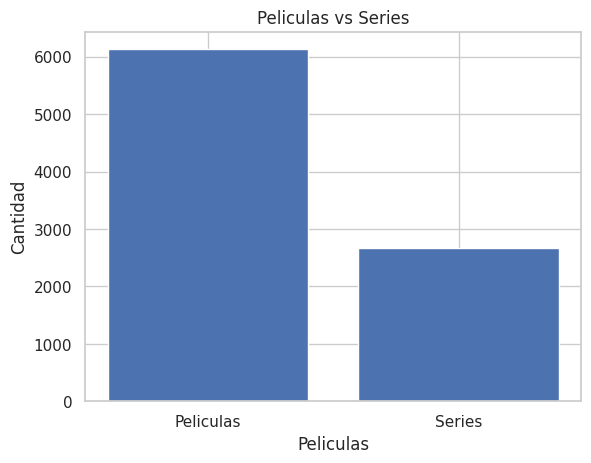

In [174]:
#Parte 1: Exploración visual básica
#1.Distribución de tipos de contenido
#Grafico de barras mostrando la cantidad de peliculas vs series
peliculas=df[df['type']=='Movie']
series=df[df['type']=='TV Show']
plt.bar(['Peliculas','Series'],[len(peliculas),len(series)])
plt.xlabel('Peliculas')
plt.ylabel('Cantidad')
plt.title('Peliculas vs Series')
plt.show()

In [175]:
#Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?
df.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


El contenido predominante en Netflix son las peliculas, con un total de 6.131.\
Esto implicaria que los usuarios contratan Netflix para ver mayormente peliculas que series y esperarian tener mejores peliculas que series.

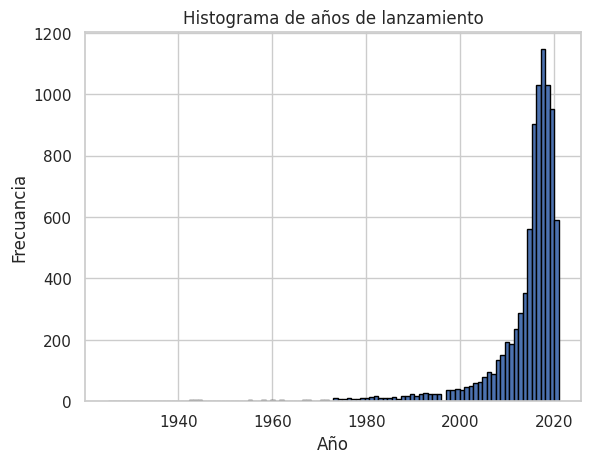

In [176]:
#2.Histograma de años de lanzamiento
#Muestra cómo se distribuyen los títulos según su release_year
data=df['release_year']
plt.hist(data,bins=100,edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Frecuancia')
plt.title('Histograma de años de lanzamiento')
plt.show()

In [177]:
#Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?
df.release_year.value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


Claramente hay mas contenido nuevo que antiguo, por el avance tecnologico y el consumo de este.\
Desde la decada del $2000$ hasta el $2018$ se ve un crecimiento exponencial.


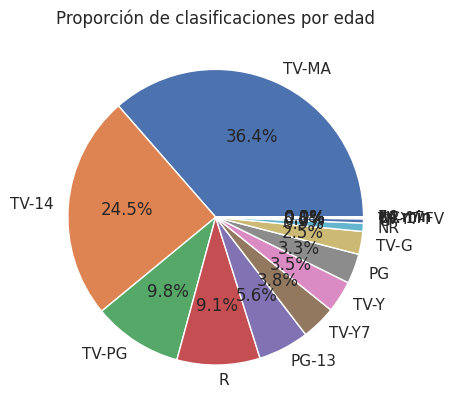

In [178]:
#3.Proporción de clasificaciones por edad (rating)
#Haz un gráfico circular o de barras.
data=df['rating']
plt.pie(data.value_counts(),labels=data.value_counts().index,autopct='%1.1f%%')
plt.title('Proporción de clasificaciones por edad')
plt.show()

In [179]:
#Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


Por lo visto en el grafico circular, la clasificacion mas comun en Netflix es TV-MA, con una frecuencia de $3.207$ veces.\
Esta clasificacion es para mayores de 17 años, por lo tanto Netflix esta enfocado en publico de adultos en su mayoria, sin embargo, para la clasificacion TV-14 tambien se tiene una frecuencia alta de $2.160$, por tanto Netflix tambien esta enfocado en publico adolescente.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


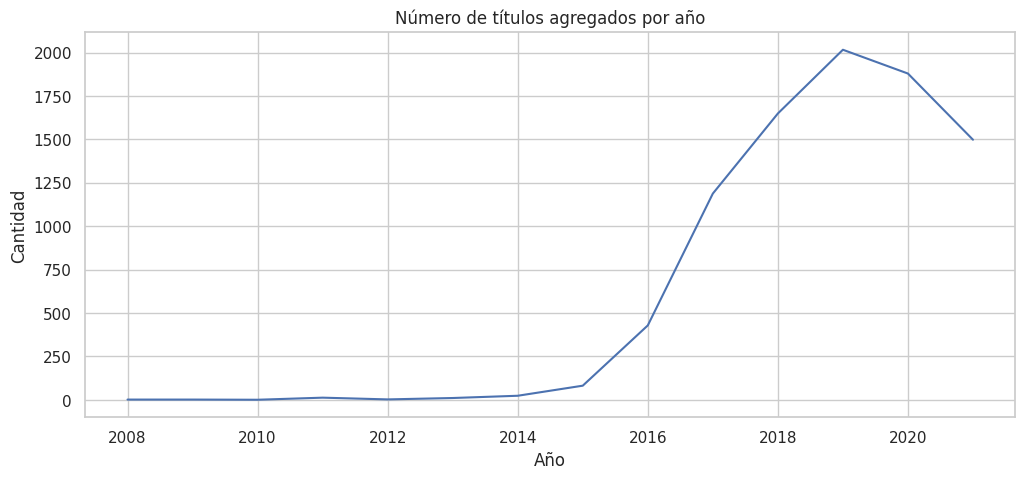

In [180]:
# Parte 2: Tendencias y evolución en el tiempo
#4.Número de títulos agregados por año
#Usa date_added (convertido a fecha) y grafica una serie temporal.
import datetime

df['date_added']=pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

df['year_added']=df['date_added'].dt.year
cantidad=df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(cantidad.index,cantidad.values)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Número de títulos agregados por año')
plt.show()

In [181]:
#Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?
df['year_added'].value_counts()

,count
year_added,
2019.0,2016
2020.0,1879
2018.0,1649
2021.0,1498
2017.0,1188
2016.0,429
2015.0,82
2014.0,24
2011.0,13


El catalogo de Netflix crecio más en el año $2019$ con $1.999$ titulos agregados a la plataforma.\
Tiene una gran relacion con la expansion internacional de la plataforma, pues en ese año Netflix empezó a crear peliculas y series no solo en Estados Unidos, si no globalmente, lo que crea un atractivo global para todo publico.

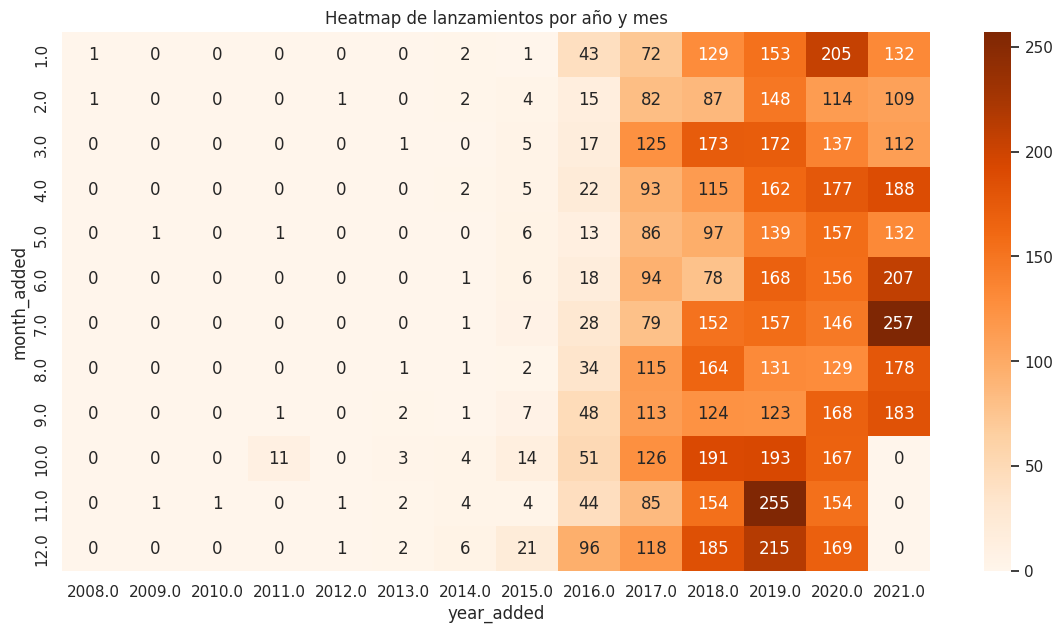

In [182]:
#5.Heatmap de lanzamientos por año y mes
#Construye un mapa de calor con year_added y month_added.
df['month_added']=df['date_added'].dt.month
matriz=pd.crosstab(df['month_added'],df['year_added'])
plt.figure(figsize=(14, 7))
sns.heatmap(matriz,annot=True,fmt="d",cmap='Oranges')
plt.title('Heatmap de lanzamientos por año y mes')
plt.show()

In [183]:
#Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?
df['month_added'].value_counts()

,count
month_added,
7.0,827
12.0,813
9.0,770
4.0,764
10.0,760
8.0,755
3.0,742
1.0,738
6.0,728


Si hay meses con mas estrenos que otros, por ejemplo en julio hay 819 lanzamientos y diciembre en hay 797, segun el heatmap, se concentra mas a fin de año el lanzamiento de titulos en Netflix.\
Esto se puede deber a que las vacaciones o festividades, estas se relacionan a tiempo libre y mas tiempo para ver Netflix.

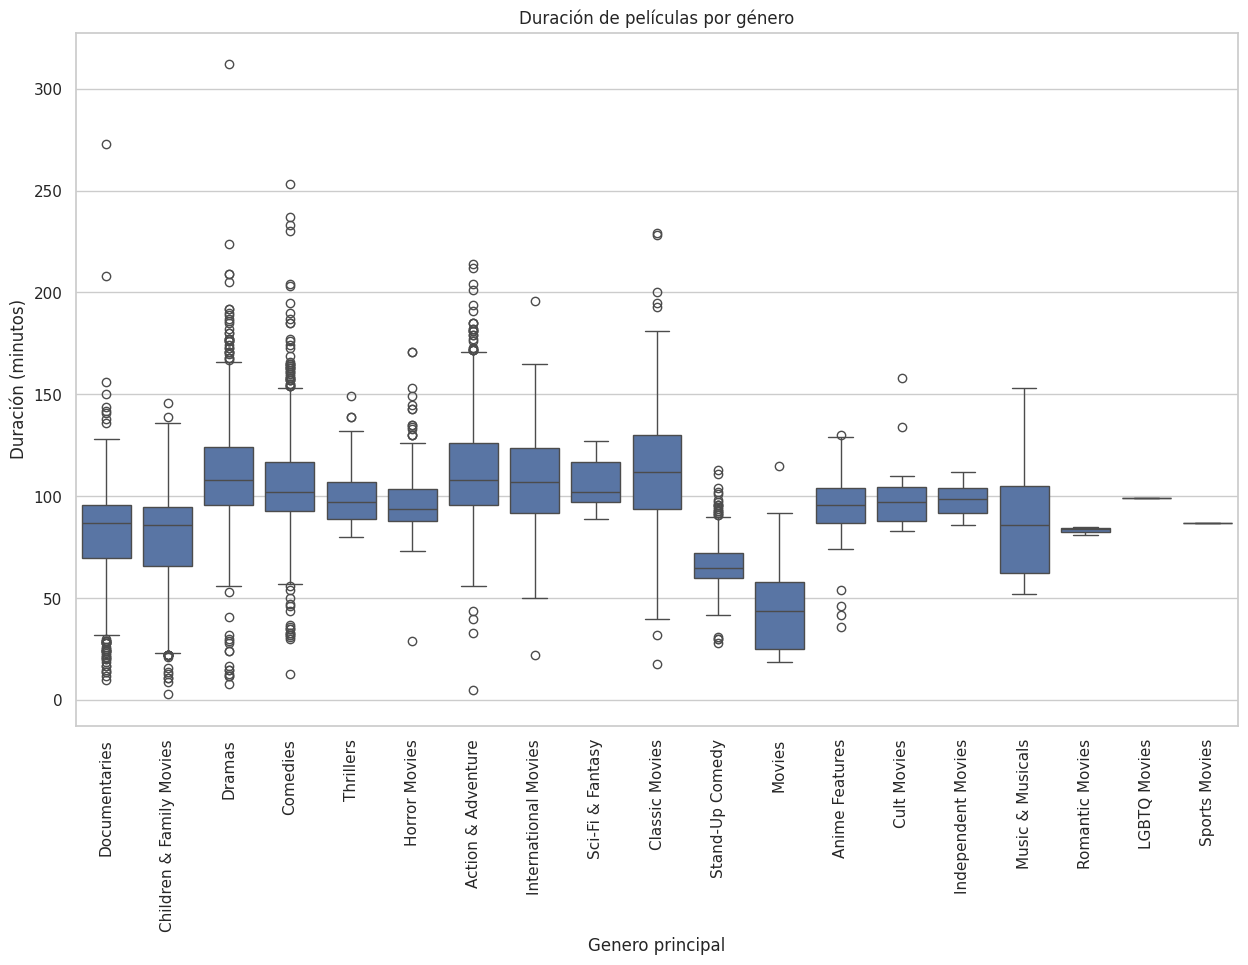

In [184]:
#6.Duración de películas por género
#Extrae la duración en minutos y crea un boxplot agrupado por género principal.
movies_df=df.loc[df['type']=='Movie'].copy()
movies_df['duration_minutes']=movies_df['duration'].str.extract(r'(\d+) min').astype(float)

movies_df['gprincipal'] = movies_df['listed_in'].str.split(',').str[0]
plt.figure(figsize=(15, 9))
sns.boxplot(x='gprincipal', y='duration_minutes', data=movies_df)
plt.xticks(rotation=90)
plt.xlabel('Genero principal')
plt.ylabel('Duración (minutos)')
plt.title('Duración de películas por género')
plt.show()

In [185]:
#Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?

Segun el Boxplot, los generos que suelen durar mas son Action & Adventure, Dramas, Classic Movies y Sci-Fi & Fantasy.\
En varios generos hay altas y bajas variabilidades, hay duraciones atipicas a las normales, por ejemplo, en el genero comedias, hay duraciones de mas de 110 minutos que es el promedio aproximadamente, por otro lado los generos como Classic Movies tiene una alta variabilidad, puesto que se encuentran peliculas de menos de 60 minutos y de mas de 2 horas, por otro lado tambien, el genero Stand-Up-Comedy tiene variabilidad baja, con duraciones entre 30 minutos y poco mas de una hora.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



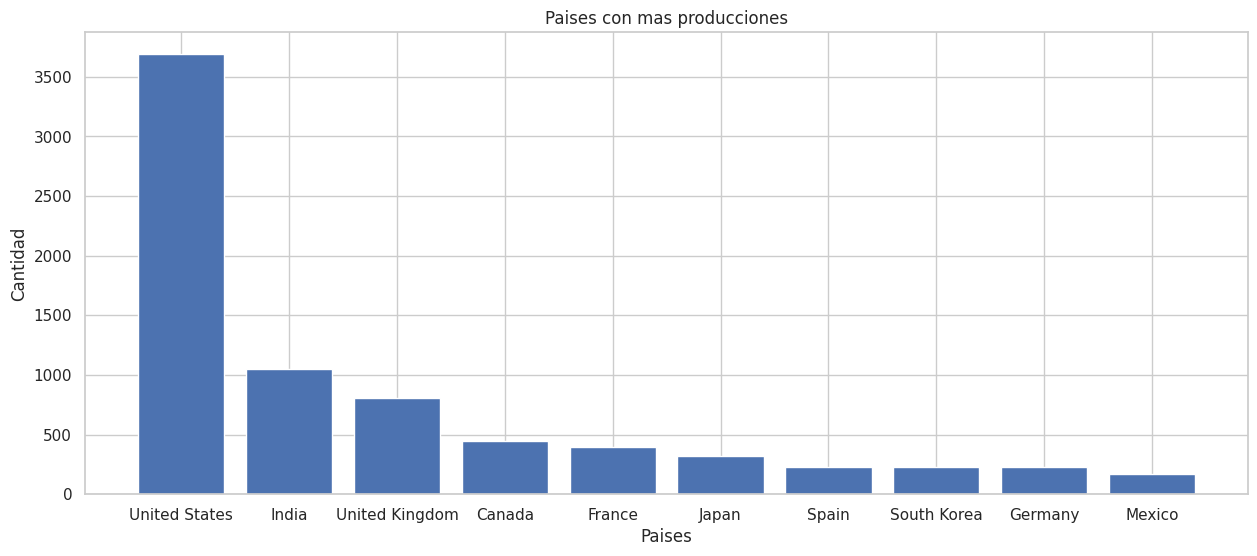

In [186]:
# Parte 3: Comparaciones y relaciones
#7.Top 10 países con más producciones
#Usa un gráfico de barras para mostrar los países más frecuentes en la columna country.
df_pais=df.dropna(subset=['country'])
pais=df_pais['country'].str.split(', ').explode()
data=pais.value_counts()[:10]
plt.figure(figsize=(15, 6))
plt.bar(data.index,data.values)
plt.xlabel('Paises')
plt.ylabel('Cantidad')
plt.title('Paises con mas producciones')
plt.show()


El pais que domina la produccion es Estados Unidos, esto no sorpende pues es el pais donde se creo la plataforma Netflix, inicialmente todas sus producciones eran de Estados Unidos.

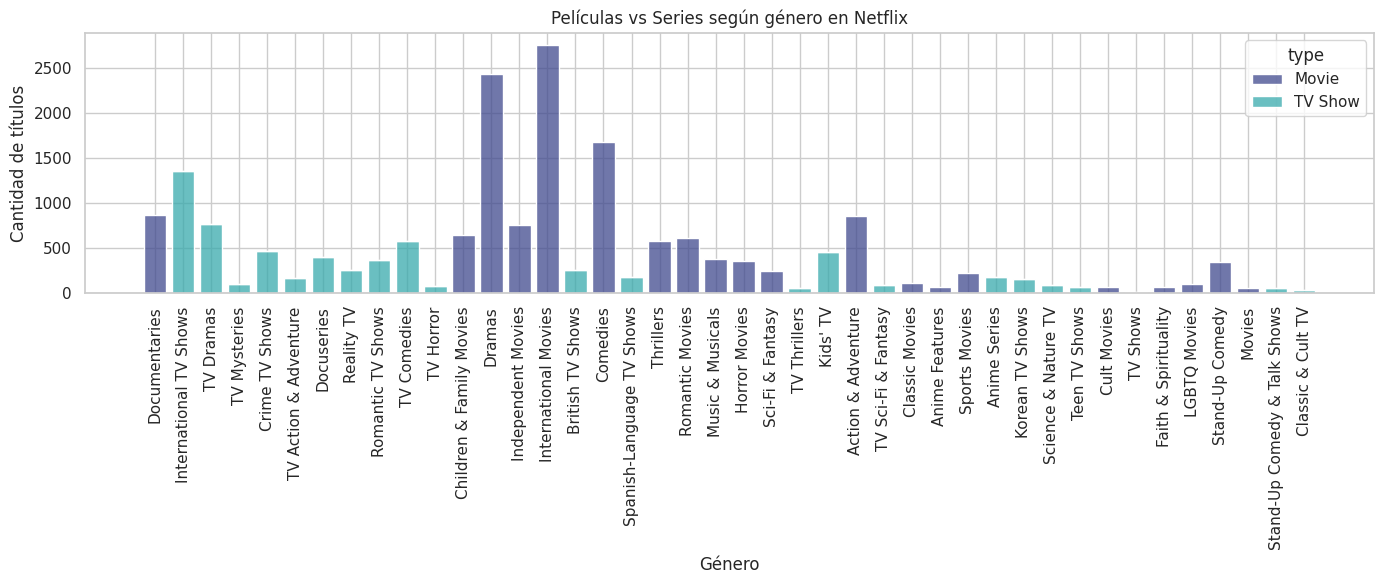

In [187]:
#8.Películas vs Series según género
#Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando Movie y TV Show.

df_genres=df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
plt.figure(figsize=(14,6))
sns.histplot(
    data=df_genres,
    x="genre",
    hue="type",
    multiple="stack",
    shrink=0.8,
    palette="mako"
)
plt.title("Películas vs Series según género en Netflix")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Hay mas generos asociados a peliculas que series, por ejemplo el genero Dramas.

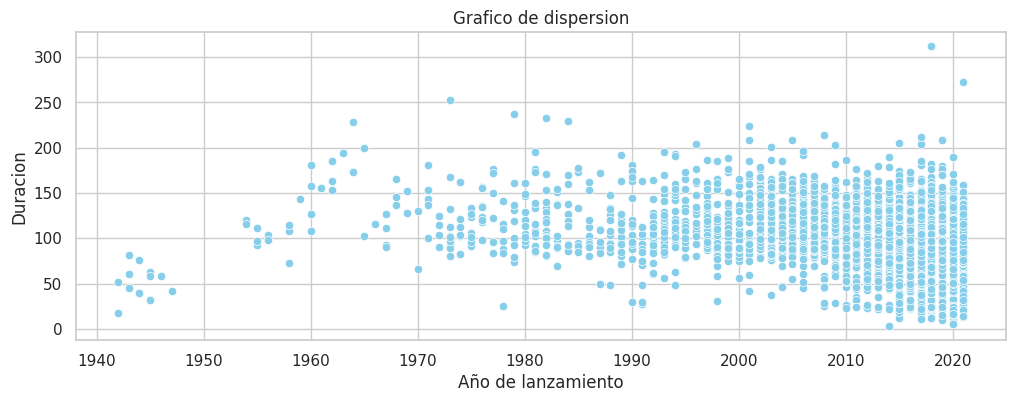

In [188]:
#9.Relación entre duración y año de lanzamiento
#Haz un gráfico de dispersión (scatterplot) con release_year en el eje X y duration (en minutos) en el eje Y.
# Crear el gráfico de línea
df_movies=df[df['type']=='Movie'].copy()
df_movies['duration_min']=df_movies['duration'].str.replace(' min','').astype(float)
plt.figure(figsize=(12, 4))
sns.scatterplot(
    data =df_movies,
    x='release_year',
    y='duration_min',
    color = 'skyblue',
)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duracion')
plt.title('Grafico de dispersion')
plt.show()

En general las duraciones siguen una tendencia y se agrupan entre los 60 minutos y lo 150 minutos, hay outliers cerca de 2020 que tienen una duracion de 270 minutos y mas de 300 minutos, muy largas peliculas.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME